In [7]:
import json
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import warnings

warnings.filterwarnings("ignore")

In [50]:
gum.config.reset()
gum.config["influenceDiagram", "chance_shape"] = "oval"
gum.config["influenceDiagram", "decision_shape"] = "box"
gum.config["influenceDiagram", "utility_shape"] = "diamond"

gum.config["influenceDiagram", "default_chance_bgcolor"] = "lightblue"
gum.config["influenceDiagram", "default_decision_bgcolor"] = "lightgreen"
gum.config["influenceDiagram", "default_utility_bgcolor"] = "lightyellow"

gum.config["influenceDiagram", "default_chance_fgcolor"] = "black"
gum.config["influenceDiagram", "default_decision_fgcolor"] = "black"
gum.config["influenceDiagram", "default_utility_fgcolor"] = "black"


In [41]:
fast_string = "purpose{new_car|used_car|furniture|electronics|appliances|repairs|education|vacation|retraining|business|others}->loan_amount{low_credit|medium_credit|high_credit|very_high_credit};employment_duration{unemployed|less_than_1_year|1_to_4_years|4_to_7_years|more_than_7_years}->savings_account_bonds{low_savings|medium_savings|high_savings|very_high_savings|no_savings};*loan_approval{yes|no};purpose->loan_duration{short_term|medium_term|long_term};age_years{young|middle_aged|old}->purpose;status_checking_account{negative_balance|small_balance|large_balance|no_account}->savings_account_bonds;age_years->credit_history{no_credits|all_credits_paid|existing_credits_paid|delayed_payment|critical_account};job{unemployed|unskilled_resident|skilled_employee|management}->employment_duration;loan_amount->loan_duration;age_years->job;loan_default{yes|no};loan_default->$utility;age_years->loan_default;loan_duration->loan_default;loan_amount->loan_default;job->loan_default;loan_approval->utility;savings_account_bonds->loan_default;credit_history->loan_default"

In [42]:
bn = gum.fastID(fast_string)

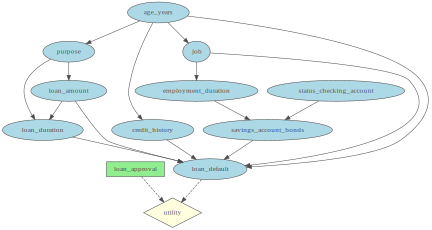

In [45]:
gnb.show(bn)

In [12]:
print(bn)

Influence Diagram{
  chance: 10,
  utility: 1,
  decision: 1,
  arcs: 17,
  domainSize: 10^6.50079
}


In [13]:
ATTRIBUTE_MAP = {
    "1": {
        "name": "Status of existing checking account",
        "type": "categorical",
        "categories": [
            "negative_balance",
            "small_balance",
            "large_balance",
            "no_account"
        ],
        "mapping": {
            "A11": "negative_balance",
            "A12": "small_balance",
            "A13": "large_balance",
            "A14": "no_account"
        },
        "identifier": "status_checking_account"
    },
    "2": {
        "name": "Duration",
        "type": "categorical",
        "categories": [
            "short_term",
            "medium_term",
            "long_term"
        ],
        "mapping": {
            "A21": "short_term",
            "A22": "medium_term",
            "A23": "long_term"
        },
        "identifier": "loan_duration"
    },
    "3": {
        "name": "Credit history",
        "type": "categorical",
        "categories": [
            "no_credits",
            "all_credits_paid",
            "existing_credits_paid",
            "delayed_payment",
            "critical_account"
        ],
        "mapping": {
            "A30": "no_credits",
            "A31": "all_credits_paid",
            "A32": "existing_credits_paid",
            "A33": "delayed_payment",
            "A34": "critical_account"
        },
        "identifier": "credit_history"
    },
    "4": {
        "name": "Purpose",
        "type": "categorical",
        "categories": [
            "new_car",
            "used_car",
            "furniture",
            "electronics",
            "appliances",
            "repairs",
            "education",
            "vacation",
            "retraining",
            "business",
            "others"
        ],
        "mapping": {
            "A40": "new_car",
            "A41": "used_car",
            "A42": "furniture",
            "A43": "electronics",
            "A44": "appliances",
            "A45": "repairs",
            "A46": "education",
            "A47": "vacation",
            "A48": "retraining",
            "A49": "business",
            "A410": "others"
        },
        "identifier": "purpose"
    },
    "5": {
        "name": "Credit amount",
        "type": "categorical",
        "categories": [
            "low_credit",
            "medium_credit",
            "high_credit",
            "very_high_credit"
        ],
        "mapping": {
            "A51": "low_credit",
            "A52": "medium_credit",
            "A53": "high_credit",
            "A54": "very_high_credit"
        },
        "identifier": "loan_amount"
    },
    "6": {
        "name": "Savings account/bonds",
        "type": "categorical",
        "categories": [
            "low_savings",
            "medium_savings",
            "high_savings",
            "very_high_savings",
            "no_savings"
        ],
        "mapping": {
            "A61": "low_savings",
            "A62": "medium_savings",
            "A63": "high_savings",
            "A64": "very_high_savings",
            "A65": "no_savings"
        },
        "identifier": "savings_account_bonds"
    },
    "7": {
        "name": "Present employment since",
        "type": "categorical",
        "categories": [
            "unemployed",
            "less_than_1_year",
            "1_to_4_years",
            "4_to_7_years",
            "more_than_7_years"
        ],
        "mapping": {
            "A71": "unemployed",
            "A72": "less_than_1_year",
            "A73": "1_to_4_years",
            "A74": "4_to_7_years",
            "A75": "more_than_7_years"
        },
        "identifier": "employment_duration"
    },
    "8": {
        "name": "Installment rate in percentage of disposable income",
        "type": "numerical",
        "identifier": "installment_rate"
    },
    "9": {
        "name": "Personal status and sex",
        "type": "categorical",
        "categories": [
            "male_divorced",
            "female_divorced",
            "male_single",
            "male_married",
            "female_single"
        ],
        "mapping": {
            "A91": "male_divorced",
            "A92": "female_divorced",
            "A93": "male_single",
            "A94": "male_married",
            "A95": "female_single"
        },
        "identifier": "personal_status_sex"
    },
    "10": {
        "name": "Other debtors / guarantors",
        "type": "categorical",
        "categories": [
            "none",
            "co_applicant",
            "guarantor"
        ],
        "mapping": {
            "A101": "none",
            "A102": "co_applicant",
            "A103": "guarantor"
        },
        "identifier": "other_debtors_guarantors"
    },
    "11": {
        "name": "Present residence since",
        "type": "categorical",
        "categories": [
            "short",
            "medium",
            "long"
        ],
        "mapping": {
            "A111": "short",
            "A112": "medium",
            "A113": "long"
        },
        "identifier": "residence_duration"
    },
    "12": {
        "name": "Property",
        "type": "categorical",
        "categories": [
            "real_estate",
            "savings_agreement",
            "car_or_other",
            "no_property"
        ],
        "mapping": {
            "A121": "real_estate",
            "A122": "savings_agreement",
            "A123": "car_or_other",
            "A124": "no_property"
        },
        "identifier": "property"
    },
    "13": {
        "name": "Age in years",
        "type": "categorical",
        "categories": [
            "young",
            "middle_aged",
            "old"
        ],
        "mapping": {
            "A131": "young",
            "A132": "middle_aged",
            "A133": "old"
        },
        "identifier": "age_years"
    },
    "14": {
        "name": "Other installment plans",
        "type": "categorical",
        "categories": [
            "bank",
            "stores",
            "none"
        ],
        "mapping": {
            "A141": "bank",
            "A142": "stores",
            "A143": "none"
        },
        "identifier": "other_installment_plans"
    },
    "15": {
        "name": "Housing",
        "type": "categorical",
        "categories": [
            "rent",
            "own",
            "for_free"
        ],
        "mapping": {
            "A151": "rent",
            "A152": "own",
            "A153": "for_free"
        },
        "identifier": "housing"
    },
    "16": {
        "name": "Number of existing credits at this bank",
        "type": "numerical",
        "identifier": "existing_credits"
    },
    "17": {
        "name": "Job",
        "type": "categorical",
        "categories": [
            "unemployed",
            "unskilled_resident",
            "skilled_employee",
            "management"
        ],
        "mapping": {
            "A171": "unemployed",
            "A172": "unskilled_resident",
            "A173": "skilled_employee",
            "A174": "management"
        },
        "identifier": "job"
    },
    "18": {
        "name": "Number of people being liable to provide maintenance for",
        "type": "numerical",
        "identifier": "maintenance_people"
    },
    "19": {
        "name": "Telephone",
        "type": "categorical",
        "categories": [
            "none",
            "yes_registered"
        ],
        "mapping": {
            "A191": "none",
            "A192": "yes_registered"
        },
        "identifier": "telephone"
    },
    "20": {
        "name": "foreign worker",
        "type": "categorical",
        "categories": [
            "yes",
            "no"
        ],
        "mapping": {
            "A201": "yes",
            "A202": "no"
        },
        "identifier": "foreign_worker"
    }
}

NUM_2_IDENTIFIER = {
    val: obj["identifier"] for val, obj in ATTRIBUTE_MAP.items()
}
IDENTIFIER_2_NUM = {
    obj["identifier"]: val for val, obj in ATTRIBUTE_MAP.items()
}

In [14]:
# read in the data for the probabilities
import pandas as pd
X = pd.read_csv("data/features.csv")

In [54]:
# calculate the probabilities
from utils.get_data import get_conditional_probability, get_probability, ATTRIBUTE_MAP

# get the identifiers from the attribute map
identifiers = [ATTRIBUTE_MAP[item]["identifier"] for item in ATTRIBUTE_MAP]

# for each of the attributes on the tree, calculate the probabilities
bn.cpt("age_years").fillWith(get_probability(X, "age_years"))

bn.cpt("purpose").fillWith(get_conditional_probability(X, "purpose", "age_years"))
bn.cpt("credit_history").fillWith(get_conditional_probability(X, "credit_history", "age_years"))
bn.cpt("job").fillWith(get_conditional_probability(X, "job", "age_years"))


bn.cpt("loan_amount").fillWith(get_conditional_probability(X, "loan_amount", "purpose"))
# bn.cpt("loan_duration").fillWith(get_conditional_probability(X, "loan_duration", "purpose"))
bn.cpt("employment_duration").fillWith(get_conditional_probability(X, "employment_duration", "job"))

bn.cpt("status_checking_account").fillWith([0.2740, 0.2690, 0.0630, 0.3940])
"done"

'done'

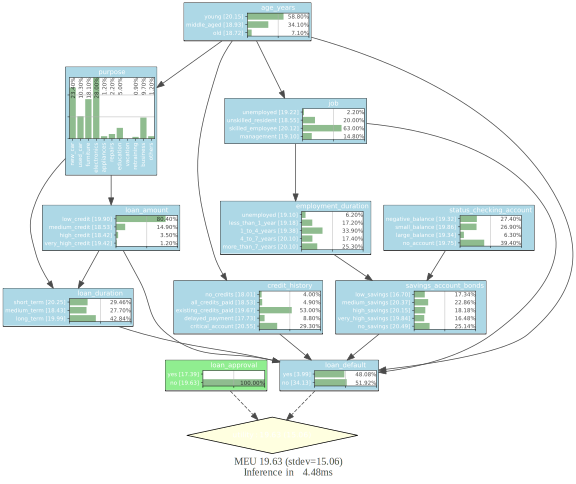

In [16]:
gnb.showInference(bn)

In [55]:
from utils.get_data import get_conditional_probability_exact as cp_exact
import itertools
# filling in the conditional probability table for the loan duration

def get_loan_duration_probabilities(X, queries):
    return [cp_exact(X, {"loan_duration": "short_term"}, queries), cp_exact(X, {"loan_duration": "medium_term"}, queries), cp_exact(X, {"loan_duration": "long_term"}, queries)]

# get the combinations of employment duration, loan amount and loan approval
combinations = list(itertools.product(ATTRIBUTE_MAP[IDENTIFIER_2_NUM["loan_amount"]]["categories"], ATTRIBUTE_MAP[IDENTIFIER_2_NUM["purpose"]]["categories"]))

# fill the conditional probability table for the loan duration
for comb in combinations:
    bn.cpt("loan_duration")[{"loan_amount": comb[0], "purpose": comb[1]}] = get_loan_duration_probabilities(X, {"loan_amount": comb[0], "purpose": comb[1]})

In [18]:
def get_probabilities(X, target, queries):
    return [cp_exact(X, {target: cat}, queries) for cat in ATTRIBUTE_MAP[IDENTIFIER_2_NUM[target]]["categories"]]

In [56]:
def get_savings_account_bonds_probabilities(X, queries):
    return [cp_exact(X, {"savings_account_bonds": "low_savings"}, queries), cp_exact(X, {"savings_account_bonds": "medium_savings"}, queries), cp_exact(X, {"savings_account_bonds": "high_savings"}, queries), cp_exact(X, {"savings_account_bonds": "very_high_savings"}, queries), cp_exact(X, {"savings_account_bonds": "no_savings"}, queries)]

# get the combinations of employment duration, loan amount and loan approval
combinations = list(itertools.product(ATTRIBUTE_MAP[IDENTIFIER_2_NUM["employment_duration"]]["categories"], ATTRIBUTE_MAP[IDENTIFIER_2_NUM["status_checking_account"]]["categories"]))

# fill the conditional probability table for the loan duration
for comb in combinations:
    bn.cpt("savings_account_bonds")[{"employment_duration": comb[0], "status_checking_account": comb[1]}] = get_savings_account_bonds_probabilities(X, {"employment_duration": comb[0], "status_checking_account": comb[1]})
    

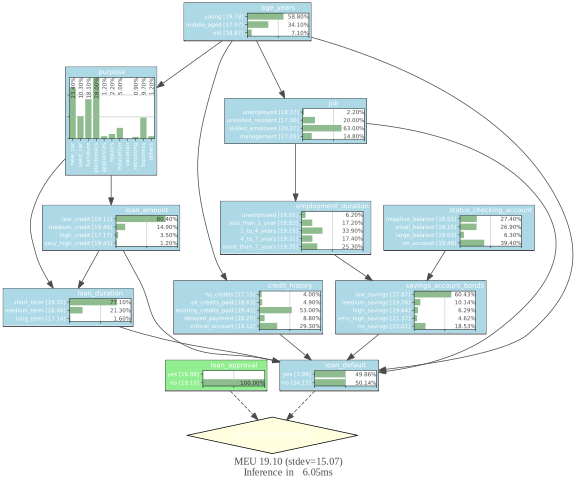

In [20]:
# inspect the chance nodes for their probabilities
gnb.showInference(bn)

In [52]:
# filling in the conditional probability table for if the loan defaults
loan_duration = ["short_term", "medium_term", "long_term"]
credit_history = ["no_credits", "all_credits_paid", "existing_credits_paid", "delayed_payment", "critical_account"]
age = ["young", "middle_aged", "old"]
job = ["unemployed", "unskilled_resident", "skilled_employee", "management"]
savings_account_bonds = ["low_savings", "medium_savings", "high_savings", "very_high_savings", "no_savings"]
loan_amount = ["low_credit", "medium_credit", "high_credit", "very_high_credit"]

def get_default_probability(job, loan_amount, credit_history, loan_duration, savings, age):
    """
    In this function, I tried to approximate the probability of a loan default based on the given attributes.

    The probability is calculated as follows:
    - Base probability: 0.5
    - Adjust based on job: unemployed (0.2), unskilled_resident (0.1), skilled_employee (-0.1), management (-0.2)
    - Adjust based on loan amount: low_credit (-0.15), medium_credit (0), high_credit (0.15), very_high_credit (0.25)
    - Adjust based on credit history: no_credits (0.1), all_credits_paid (-0.2), existing_credits_paid (-0.1), delayed_payment (0.2), critical_account (0.3)
    - Adjust based on loan duration: short_term (-0.1), medium_term (0), long_term (0.1)
    - Adjust based on savings: low_savings (0.1), medium_savings (0), high_savings (-0.1), very_high_savings (-0.2), no_savings (0.2)
    - Adjust based on age: young (0.1), middle_aged (-0.1), old (0)

    The final probability is ensured to be between 0 and 1.

    The weights for each attribute were chosen based on the intuition that certain attributes would have a higher or lower impact on the probability of loan default and can be adjusted as needed.
    """
    # Base probability
    prob = 0.5
    
    # Adjust based on job
    job_factor = {"unemployed": 0.2, "unskilled_resident": 0.1, "skilled_employee": -0.1, "management": -0.2}
    prob += job_factor[job]
    
    # Adjust based on loan amount
    amount_factor = {"low_credit": -0.15, "medium_credit": 0, "high_credit": 0.15, "very_high_credit": 0.25}
    prob += amount_factor[loan_amount]
    
    # Adjust based on credit history
    history_factor = {"no_credits": 0.1, "all_credits_paid": -0.2, "existing_credits_paid": -0.1, "delayed_payment": 0.2, "critical_account": 0.3}
    prob += history_factor[credit_history]
    
    # Adjust based on loan duration
    duration_factor = {"short_term": -0.1, "medium_term": 0, "long_term": 0.1}
    prob += duration_factor[loan_duration]
    
    # Adjust based on savings
    savings_factor = {"low_savings": 0.1, "medium_savings": 0, "high_savings": -0.1, "very_high_savings": -0.2, "no_savings": 0.2}
    prob += savings_factor[savings]
    
    # Adjust based on age
    age_factor = {"young": 0.1, "middle_aged": -0.1, "old": 0}
    prob += age_factor[age]
    
    # Ensure probability is between 0 and 1
    prob = max(0, min(1, prob))
    
    return prob

# get the combinations of job, loan amount, savings account bonds, job and age
combinations = list(itertools.product(job, loan_amount, credit_history, loan_duration, savings_account_bonds, age))

# fill the conditional probability table for the loan default
for comb in combinations:
    default_prob = get_default_probability(comb[0], comb[1], comb[2], comb[3], comb[4], comb[5])
    bn.cpt("loan_default")[{"job": comb[0], "loan_amount": comb[1], "credit_history": comb[2], "loan_duration": comb[3], "savings_account_bonds": comb[4], "age_years": comb[5]}] = [default_prob, 1 - default_prob]

In [31]:
# setting the utility node
bn.utility("utility")[{"loan_default": "no", "loan_approval": "yes"}] = 100
bn.utility("utility")[{"loan_default": "no", "loan_approval": "no"}] = 0
bn.utility("utility")[{"loan_default": "yes", "loan_approval": "yes"}] = -100
bn.utility("utility")[{"loan_default": "yes", "loan_approval": "no"}] = 0 # if the loan is not approved, the utility is 0

In [42]:
ie = gum.ShaferShenoyLIMIDInference(bn)

In [43]:
# sample people applying for loans
john = {
    "age_years": "old",
    "credit_history": "no_credits",
    "purpose": "new_car",
    "job": "management",
    "loan_amount": "low_credit",
    "loan_duration": "short_term",
    "employment_duration": "more_than_7_years"
}

janet = {
    "age_years": "middle_aged",
    "credit_history": "all_credits_paid",
    "purpose": "business",
    "job": "skilled_employee",
    "loan_amount": "medium_credit",
    "loan_duration": "long_term",
    "employment_duration": "1_to_4_years"
}

simba = {
    "age_years": "old",
    "credit_history": "existing_credits_paid",
    "purpose": "education",
    "job": "unemployed",
}

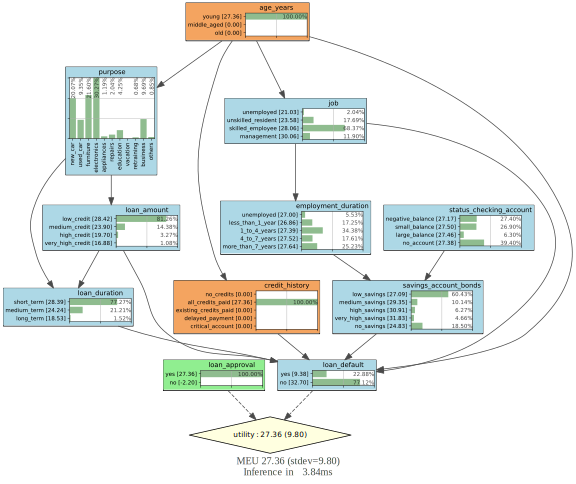

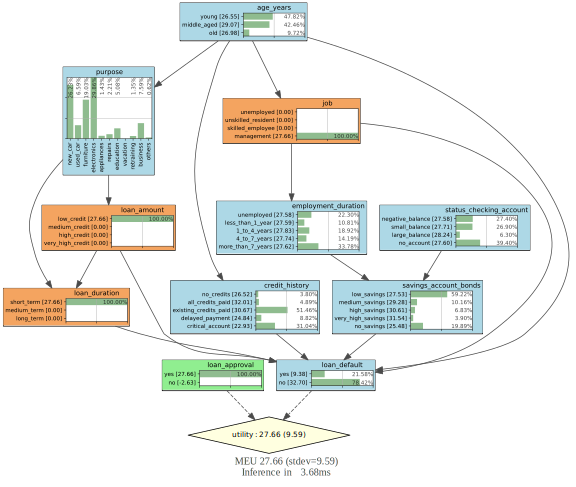

In [58]:
# showing the inferences based on a bunch of simple cases
gnb.showInference(bn, evs={"credit_history": "all_credits_paid", "age_years": "young"})

# simple non-default case
gnb.showInference(bn, evs={"job": "management", "loan_amount": "low_credit", "loan_duration": "short_term"})

In [ ]:
# set some evidence and query the utility
ie.setEvidence(simba)
ie.makeInference()
print("------------simba------------")
print(ie.posterior("loan_approval").argmax())
print(f"Utility: {ie.MEU()['mean']}")
print()

ie.setEvidence(john)
ie.makeInference()
print("----------------john------------")
print(ie.posterior("loan_approval").argmax())
print(f"Utility: {ie.MEU()['mean']}")
print()

ie.setEvidence(janet)
ie.makeInference()
print("----------------janet------------")
print(ie.posterior("loan_approval").argmax())
print(f"Utility: {ie.MEU()['mean']}")
print()

In [6]:
bn.saveBIFXML("data/loan_approval.bif.xml")